## Task 1 - Part 1

#### Step 1 − Import the necessary packages

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels import robust



#### Step 1.5 − Aux Functions

In [3]:
def regresssor_matrix (u, y, n, m, d):
    N = len(y) # samples number
    p = max(n, d+m) #initial conditions ?

    X=[]
    Y=[]

    for k in range (p, N):
        phi = []

        #past n values of y
        for i in range (1, n+1):
            phi.append(-y[k-i])

        #past m+1 values of u
        for i in range (0, m+1):
            phi.append(u[k-d-i])
        
        X.append(phi)
        Y.append(y[k])
    
    return np.array(X), np.array(Y)



#### Step 2 − Load the dataset

In [4]:
# import data:
y_train = np.load('output_train.npy')
u_test = np.load('u_test.npy')
u_train = np.load('u_train.npy')

print(y_train.shape)
print(u_test.shape)
print(u_train.shape)



(2040,)
(510,)
(2040,)


#### Step 3 − Plot the trainning features and outputs

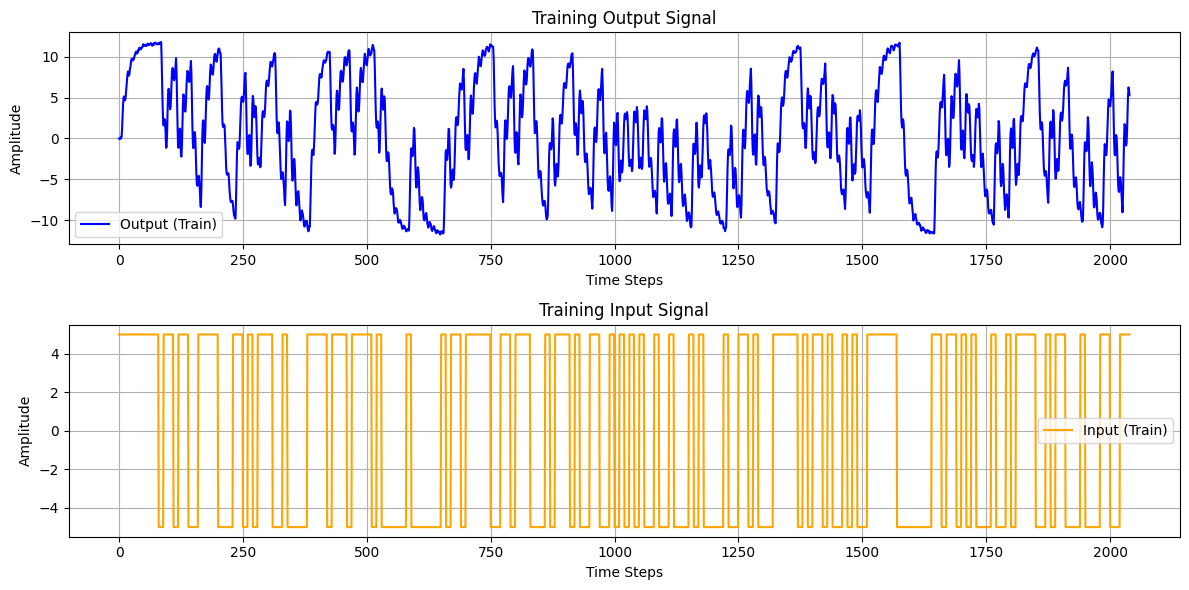

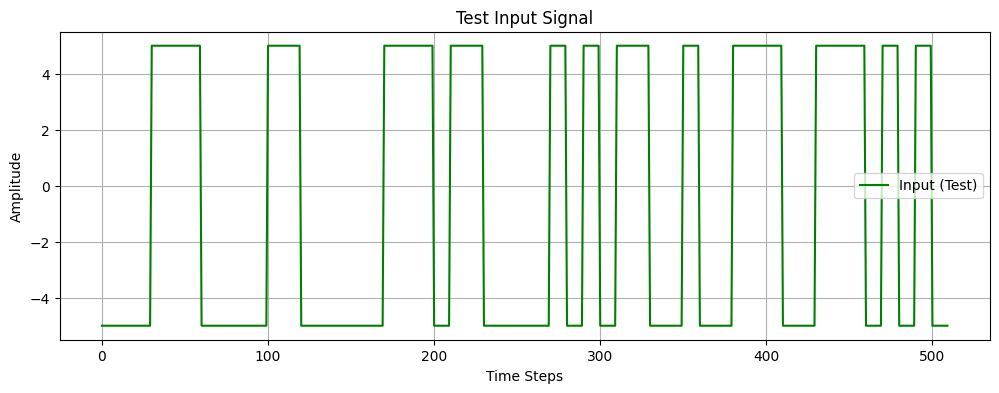

In [5]:
# Define time axes for training and testing sets
train_time = np.arange(len(y_train))  # Time index for training data
test_time = np.arange(len(u_test))         # Time index for test data

# Plotting the training input and output signals
plt.figure(figsize=(12, 6))

# Plot output_train (training set output)
plt.subplot(2, 1, 1)  # Two rows, one column, first plot
plt.plot(train_time, y_train, label="Output (Train)", color='blue')
plt.title("Training Output Signal")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

# Plot u_train (training set input)
plt.subplot(2, 1, 2)  # Two rows, one column, second plot
plt.plot(train_time, u_train, label="Input (Train)", color='orange')
plt.title("Training Input Signal")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

# Adjust the layout
plt.tight_layout()
plt.show()

# Plotting the test input signal (u_test)
plt.figure(figsize=(12, 4))
plt.plot(test_time, u_test, label="Input (Test)", color='green')
plt.title("Test Input Signal")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.show()

####Step 3 - Scaling

In [6]:
# Initialize scalers for input and output
scaler_u = StandardScaler()
scaler_y = StandardScaler()

# Fit scaler on training data and transform both training and test data
u_train_scaled = scaler_u.fit_transform(u_train.reshape(-1, 1)).flatten()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

u_test_scaled = scaler_u.transform(u_test.reshape(-1, 1)).flatten()

# Check the mean and variance of scaled data
print(f'Scaled u_train mean: {u_train_scaled.mean()}, std: {u_train_scaled.std()}')
print(f'Scaled y_train mean: {y_train_scaled.mean()}, std: {y_train_scaled.std()}')

# Use the scaled data in your ARX modeling

Scaled u_train mean: -1.2538989454590003e-16, std: 0.9999999999999999
Scaled y_train mean: 4.179663151530001e-17, std: 1.0


#### Step 4.1 - ARX attempt

Best parameters: Y=(2040,) X=(2040, 1), theta=(1,)
Best parameters: Y=(2039,) X=(2039, 1), theta=(1,)
Best parameters: Y=(2038,) X=(2038, 1), theta=(1,)
Best parameters: Y=(2037,) X=(2037, 1), theta=(1,)
Best parameters: Y=(2036,) X=(2036, 1), theta=(1,)
Best parameters: Y=(2035,) X=(2035, 1), theta=(1,)
Best parameters: Y=(2034,) X=(2034, 1), theta=(1,)
Best parameters: Y=(2033,) X=(2033, 1), theta=(1,)
Best parameters: Y=(2032,) X=(2032, 1), theta=(1,)
Best parameters: Y=(2031,) X=(2031, 1), theta=(1,)
Best parameters: Y=(2032,) X=(2032, 2), theta=(2,)
Best parameters: Y=(2031,) X=(2031, 2), theta=(2,)
Best parameters: Y=(2031,) X=(2031, 3), theta=(3,)
Best parameters: Y=(2030,) X=(2030, 3), theta=(3,)
Best parameters: Y=(2030,) X=(2030, 4), theta=(4,)
Best parameters: Y=(2029,) X=(2029, 4), theta=(4,)
Best parameters: Y=(2029,) X=(2029, 5), theta=(5,)
Best parameters: Y=(2028,) X=(2028, 5), theta=(5,)
Best parameters: Y=(2028,) X=(2028, 6), theta=(6,)
Best parameters: Y=(2027,) X=(2

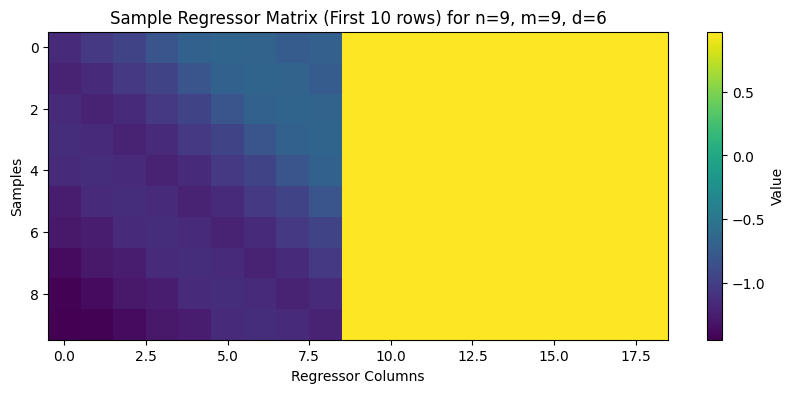

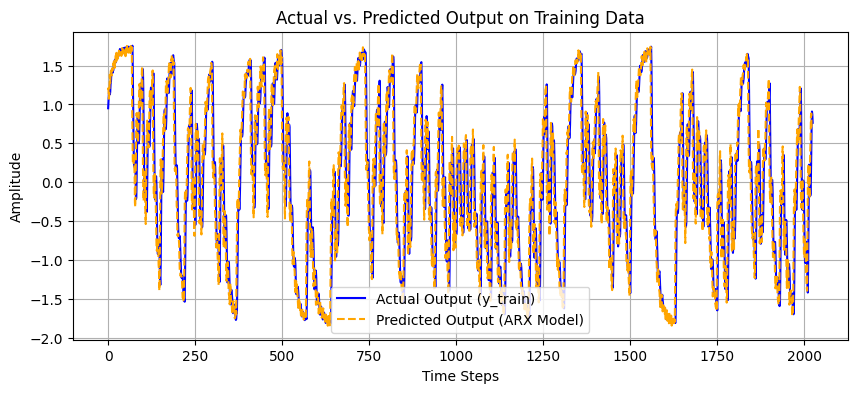

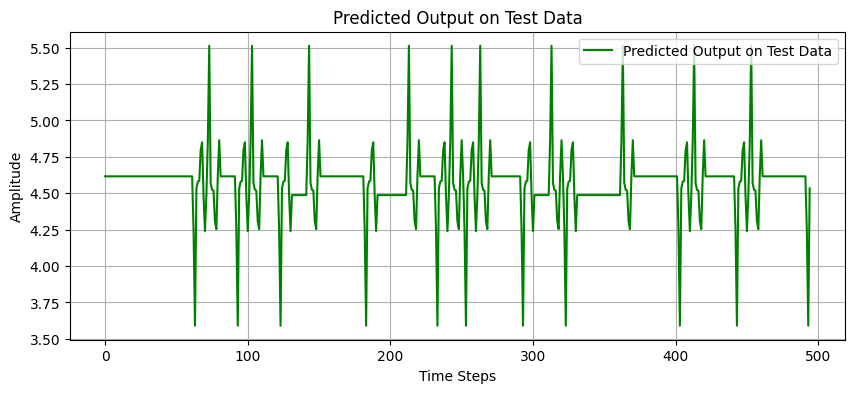

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define wider ranges for n, m, d
n_values = list(range(0,10))  # now testing n from 1 to 20
m_values = list(range(0, 10))  # now testing m from 1 to 20
d_values = list(range(0, 10))    # now testing d from 0 to 5

# Perform grid search to find the best n, m, d using training data
best_sse = np.inf
best_params = (None, None, None)

for n in n_values:
    for m in m_values:
        for d in d_values:
            # Create regressor matrix for training data
            X_train, Y_train = regresssor_matrix(u_train_scaled, y_train_scaled, n, m, d)
            
            # Estimate theta using least squares
            theta_pred = np.linalg.lstsq(X_train, Y_train, rcond=None)[0]
            
            # Predict the output on the training data itself (validation)
            Y_pred_train = X_train @ theta_pred
            
            # Calculate SSE (Sum of Squared Errors) on the training set
            sse = np.sum((Y_train - Y_pred_train) ** 2)
            
            # Update best parameters if current model is better
            if sse < best_sse:
                best_sse = sse
                best_params = (n, m, d)
       
                print(f'Best parameters: Y={Y_train.shape} X={X_train.shape}, theta={theta_pred.shape}')

print(f'Best parameters: n={best_params[0]}, m={best_params[1]}, d={best_params[2]}')
print(f'Best SSE on training data: {best_sse}')

# Plot sample regressor matrix (first 10 rows)
plt.figure(figsize=(10, 4))
plt.title(f"Sample Regressor Matrix (First 10 rows) for n={best_params[0]}, m={best_params[1]}, d={best_params[2]}")
plt.imshow(X_train[:10, :], cmap='viridis', aspect='auto')
plt.colorbar(label="Value")
plt.xlabel("Regressor Columns")
plt.ylabel("Samples")
plt.show()

# Plot actual vs predicted output on training data
plt.figure(figsize=(10, 4))
plt.plot(y_train_scaled[max(best_params[0], best_params[2] + best_params[1]):], label="Actual Output (y_train)", color='blue')
plt.plot(Y_pred_train, label="Predicted Output (ARX Model)", color='orange', linestyle='dashed')
plt.title("Actual vs. Predicted Output on Training Data")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# After determining the best n, m, d, predict on u_test
n_best, m_best, d_best = best_params

# Re-create the regressor matrix for the test input using scaled data
X_test = []
for k in range(max(n_best, d_best + m_best), len(u_test)):
    phi = []
    # Add past n_best values of y_train_scaled (since we don't have y_test)
    for i in range(1, n_best + 1):
        phi.append(-y_train_scaled[-i])  # Use the last known scaled y_train values for prediction
    # Add past m_best+1 values of u_test_scaled
    phi.extend(u_train_scaled[k - d_best:k - d_best + m_best + 1])  # Add scaled past values from u_train
    X_test.append(phi)

X_test = np.array(X_test)

# Scaling the test input using the scaler fitted on training regressor matrix
scaler_X = StandardScaler()
scaler_X.fit(X_train)  # Only fit the scaler on the training data regressor matrix
X_test_scaled = scaler_X.transform(X_test)

# Predict output for the test set
y_pred_test_scaled = X_test_scaled @ theta_pred

# Inverse transform to get back to original scale
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

# Plot the predicted output for the test input
plt.figure(figsize=(10, 4))
plt.plot(y_pred_test, label="Predicted Output on Test Data", color='green')
plt.title("Predicted Output on Test Data")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


#### Step 4 - With regularization


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge

# Define wider ranges for n, m, d
n_values = list(range(0, 10))  # testing n from 0 to 9
m_values = list(range(0, 10))  # testing m from 0 to 9
d_values = list(range(0, 10))  # testing d from 0 to 9

# Scale the input and output data
scaler_u = StandardScaler()
scaler_y = StandardScaler()

# Fit the scalers on training data
u_train_scaled = scaler_u.fit_transform(u_train.reshape(-1, 1)).flatten()  # Reshape for scaler
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()  # Reshape for scaler

# Split the test data into validation and final test sets
validation_end_idx = 2300
u_valid = u_test[:validation_end_idx - 2040]  # First 260 samples of u_test for validation

u_test_final = u_test[validation_end_idx - 2040:]  # Remaining samples for the final test

# Scale the validation and test data
u_valid_scaled = scaler_u.transform(u_valid.reshape(-1, 1)).flatten()
u_test_scaled = scaler_u.transform(u_test_final.reshape(-1, 1)).flatten()

# Perform grid search to find the best n, m, d using training and validation data
best_sse_val = np.inf
best_params = (None, None, None)

# Regularization parameters
alpha_lasso = 0.1  # Adjust this value as needed for Lasso
alpha_ridge = 1.0  # Adjust this value as needed for Ridge

for n in n_values:
    for m in m_values:
        for d in d_values:
            # Create regressor matrix for training data
            X_train, Y_train = regresssor_matrix(u_train_scaled, y_train_scaled, n, m, d)

            # Create regressor matrix for validation data
            # Important: Start index from max(n, d + m) to avoid index out of bounds
            X_valid = []
            Y_valid = []
            
            for k in range(max(n, d + m), len(u_valid_scaled)):
                phi = []
                
                # Add past n values of y_train_scaled (since we don't have y_valid)
                if k - n >= 0:
                    for i in range(1, n + 1):
                        phi.append(-y_train_scaled[-i])  # Use the last scaled y_train values for validation
                else:
                    # If not enough past y values, fill with zeros or another strategy
                    phi.extend([0] * n)

                # Add past m+1 values of u_valid_scaled
                if k - d - m >= 0:
                    phi.extend(u_valid_scaled[k - d:k - d + m + 1])
                else:
                    # If not enough past u values, fill with zeros or another strategy
                    phi.extend([0] * (m + 1))

                # Ensure consistent length of phi
                if len(phi) == (n + m + 1):
                    X_valid.append(phi)
                    Y_valid.append(y_train_scaled[-(len(u_valid_scaled) - k)])  # Use corresponding y_train for the output
            
            # Convert to NumPy arrays
            X_valid = np.array(X_valid)
            Y_valid = np.array(Y_valid)

            # Now proceed with Lasso and Ridge regressions
            # Lasso Regression
            lasso = Lasso(alpha=alpha_lasso)
            lasso.fit(X_train, Y_train)
            Y_pred_valid_lasso = lasso.predict(X_valid)
            sse_valid_lasso = np.sum((Y_valid - Y_pred_valid_lasso) ** 2)

            # Ridge Regression
            ridge = Ridge(alpha=alpha_ridge)
            ridge.fit(X_train, Y_train)
            Y_pred_valid_ridge = ridge.predict(X_valid)
            sse_valid_ridge = np.sum((Y_valid - Y_pred_valid_ridge) ** 2)

            # Update best parameters if current model is better (based on validation set)
            if sse_valid_lasso < best_sse_val:
                best_sse_val = sse_valid_lasso
                best_params = (n, m, d, 'Lasso', alpha_lasso)

            if sse_valid_ridge < best_sse_val:
                best_sse_val = sse_valid_ridge
                best_params = (n, m, d, 'Ridge', alpha_ridge)



print(f'Best parameters: n={best_params[0]}, m={best_params[1]}, d={best_params[2]}')
print(f'Best SSE on validation data: {best_sse_val}')

# After determining the best n, m, d, predict on u_test_final
n_best, m_best, d_best, reg_type, alpha_best = best_params  # Adjusted unpacking

# Re-create the regressor matrix for the test input using scaled data
y_pred_test = []  # To store the predicted y values autoregressively

# Use the last `n_best` values of `y_train_scaled` to start the autoregressive prediction
y_past = list(y_train_scaled[-n_best:])  # Last known outputs to start predictions

# Autoregressive prediction loop
for k in range(max(n_best, d_best + m_best), len(u_test_final)):
    phi = []
    
    # Add past n_best values of y_past (last known or predicted y)
    for i in range(1, n_best + 1):
        phi.append(-y_past[-i])  # Use the last predicted y values for autoregression
    
    # Add past (m_best + 1) values of u_test_scaled (including current)
    phi.extend(u_test_scaled[k - d_best:k - d_best + m_best + 1])  # Include current and past u_test values
    
    # Convert phi to a 2D array with the correct number of features
    phi = np.array(phi).reshape(1, -1)  # Ensure phi is 2D with correct shape (1 sample, num_features)
    
    # Check if the number of features in phi matches what the model was trained on
    assert phi.shape[1] == n_best + (m_best + 1), f"Feature mismatch: phi has {phi.shape[1]} features, but model expects {n_best + (m_best + 1)}"
    
    # Predict the next y value using the best model (Lasso or Ridge)
    if reg_type == 'Lasso':
        y_next_scaled = lasso.predict(phi)
    elif reg_type == 'Ridge':
        y_next_scaled = ridge.predict(phi)
    
    # Inverse transform to get back to original scale
    y_next = scaler_y.inverse_transform(y_next_scaled.reshape(-1, 1)).flatten()[0]
    
    # Append the predicted y value for future steps
    y_pred_test.append(y_next)
    y_past.append(y_next)  # Update y_past with the predicted value for autoregressive prediction


# Plot the predicted output for the test input
plt.figure(figsize=(10, 4))
plt.plot(y_pred_test, label=f"Predicted Output on Test Data ({reg_type})", color='green')
plt.title(f"Predicted Output on Test Data ({reg_type})")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


Best parameters: n=0, m=0, d=0
Best SSE on validation data: 207.43930960636385


ValueError: X has 1 features, but Lasso is expecting 19 features as input.

#### Step 4 - Trying hyperparameter tuning - Random search


Training Lasso for n=0, m=0, d=0...

Training Lasso for n=0, m=0, d=1...

Training Lasso for n=0, m=0, d=2...

Training Lasso for n=0, m=0, d=3...

Training Lasso for n=0, m=0, d=4...

Training Lasso for n=0, m=0, d=5...

Training Lasso for n=0, m=0, d=6...

Training Lasso for n=0, m=0, d=7...

Training Lasso for n=0, m=0, d=8...

Training Lasso for n=0, m=0, d=9...

Training Lasso for n=0, m=1, d=0...

Training Lasso for n=0, m=1, d=1...

Training Lasso for n=0, m=1, d=2...

Training Lasso for n=0, m=1, d=3...

Training Lasso for n=0, m=1, d=4...

Training Lasso for n=0, m=1, d=5...

Training Lasso for n=0, m=1, d=6...

Training Lasso for n=0, m=1, d=7...

Training Lasso for n=0, m=1, d=8...

Training Lasso for n=0, m=1, d=9...

Training Lasso for n=0, m=2, d=0...

Training Lasso for n=0, m=2, d=1...

Training Lasso for n=0, m=2, d=2...

Training Lasso for n=0, m=2, d=3...

Training Lasso for n=0, m=2, d=4...

Training Lasso for n=0, m=2, d=5...

Training Lasso for n=0, m=2, d=6...



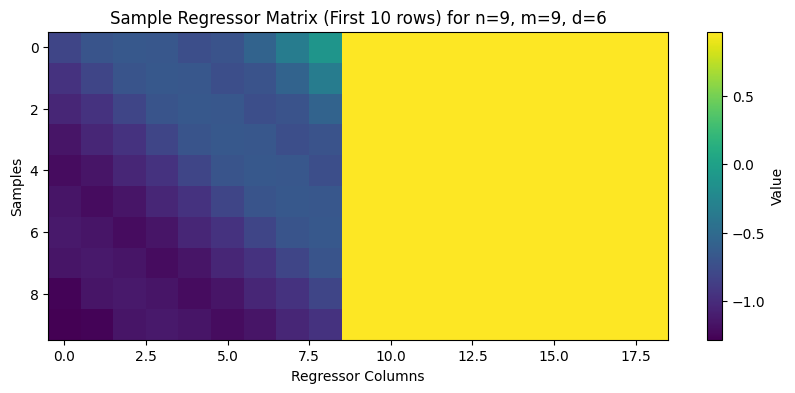

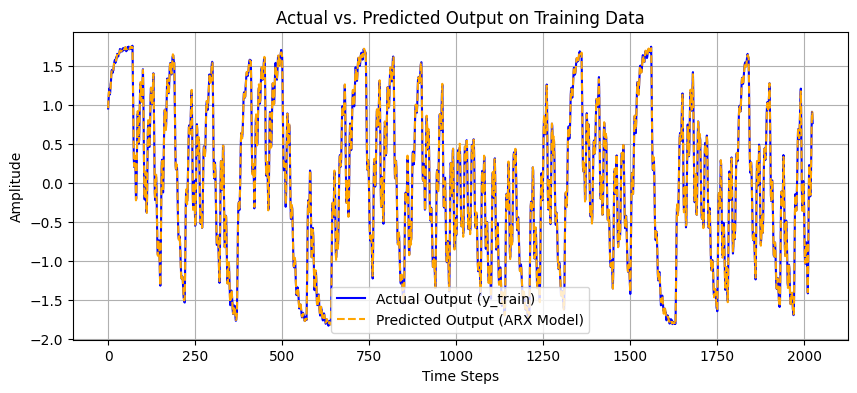

Shape of X_test: (495, 19)
Shape of X_train: (2025, 19)


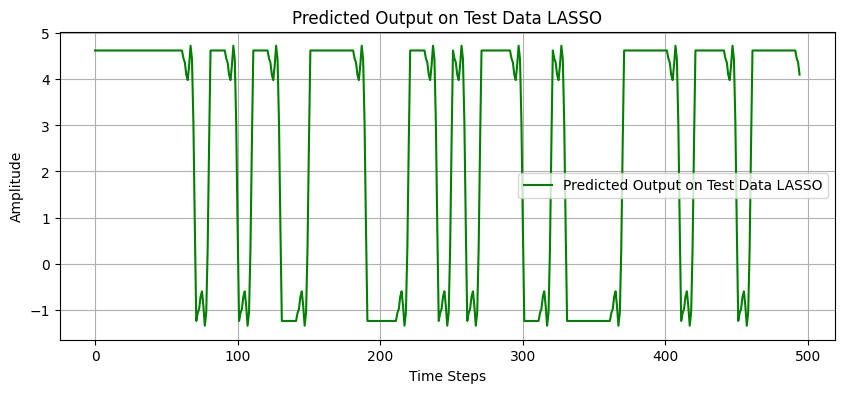

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge

n_values = list(range(0,10))  # now testing n from 1 to 20
m_values = list(range(0, 10))  # now testing m from 1 to 20
d_values = list(range(0, 10))    # now testing d from 0 to 5

# Scale the input and output data
scaler_u = StandardScaler()
scaler_y = StandardScaler()

# Fit the scalers on training data
u_train_scaled = scaler_u.fit_transform(u_train.reshape(-1, 1)).flatten()  # Reshape for scaler
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()  # Reshape for scaler

# Prepare to collect the best model
best_model = None
best_score = np.inf
best_params = {}
best_algorithm = None 

# Hyperparameter grid
param_distributions = {
    'alpha': np.logspace(-6, 1, 50),  # Regularization strength for Lasso and Ridge
}

def random_search_lasso_ridge(u_train_scaled, y_train_scaled):
    global best_model, best_score, best_params
    
    for n in n_values:
        for m in m_values:
            for d in d_values:
                # Create regressor matrix for training data
                X_train, Y_train = regresssor_matrix(u_train_scaled, y_train_scaled, n, m, d)

                print(f"\nTraining Lasso for n={n}, m={m}, d={d}...")

                # Set up randomized search for Lasso with increased iterations
                lasso = Lasso(max_iter=50000)  # Increase max_iter for convergence
                lasso_search = RandomizedSearchCV(lasso, param_distributions={'alpha': param_distributions['alpha']},
                                                   scoring='neg_mean_squared_error', n_iter=20, cv=3)
                lasso_search.fit(X_train, Y_train)
                
                # Evaluate and save the best Lasso model
                if -lasso_search.best_score_ < best_score:
                    best_score = -lasso_search.best_score_
                    best_params = {'n': n, 'm': m, 'd': d, 'alpha': lasso_search.best_params_['alpha']}
                    best_model = lasso_search.best_estimator_
                    best_algorithm = 'Lasso'  # Track the best algorithm
                
                # Set up randomized search for Ridge with increased iterations
                ridge = Ridge(max_iter=50000)  # Increase max_iter for convergence
                ridge_search = RandomizedSearchCV(ridge, param_distributions={'alpha': param_distributions['alpha']},
                                                   scoring='neg_mean_squared_error', n_iter=20  , cv=3)
                ridge_search.fit(X_train, Y_train)
                
                # Evaluate and save the best Ridge model
                if -ridge_search.best_score_ < best_score:
                    best_score = -ridge_search.best_score_
                    best_params = {'n': n, 'm': m, 'd': d, 'alpha': ridge_search.best_params_['alpha']}
                    best_model = ridge_search.best_estimator_
                    best_algorithm = 'Ridge'  # Track the best algorithm

# Run the random search
random_search_lasso_ridge(u_train_scaled, y_train_scaled)

print(f'Best parameters: {best_params}')
print(f'Best cross-validated MSE on training data: {best_score}')
print(f'Best regularization algorithm: {best_model}')  # Print the best algorithm

# Prepare regressor matrix for the best params
X_train, Y_train = regresssor_matrix(u_train_scaled, y_train_scaled, best_params['n'], best_params['m'], best_params['d'])

# Plot sample regressor matrix (first 10 rows)
plt.figure(figsize=(10, 4))
plt.title(f"Sample Regressor Matrix (First 10 rows) for n={best_params['n']}, m={best_params['m']}, d={best_params['d']}")
plt.imshow(X_train[:10, :], cmap='viridis', aspect='auto')
plt.colorbar(label="Value")
plt.xlabel("Regressor Columns")
plt.ylabel("Samples")
plt.show()

# Plot actual vs predicted output on training data
Y_pred_train = best_model.predict(X_train)
plt.figure(figsize=(10, 4))
plt.plot(y_train_scaled[max(best_params['n'], best_params['m'] + best_params['d']):], label="Actual Output (y_train)", color='blue')
plt.plot(Y_pred_train, label="Predicted Output (ARX Model)", color='orange', linestyle='dashed')
plt.title("Actual vs. Predicted Output on Training Data")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# After determining the best parameters, predict on u_test
n_best, m_best, d_best, alpha_best = best_params['n'], best_params['m'], best_params['d'], best_params['alpha']

# Re-create the regressor matrix for the test input using scaled data
X_test = []
for k in range(max(n_best, d_best + m_best), len(u_test)):
    phi = []
    # Add past n_best values of y_train_scaled (since we don't have y_test)
    for i in range(1, n_best + 1):
        phi.append(-y_train_scaled[-i])  # Use the last known scaled y_train values for prediction
    # Add past m_best+1 values of u_test_scaled
    phi.extend(u_train_scaled[k - d_best:k - d_best + m_best + 1])  # Add scaled past values from u_train
    X_test.append(phi)

X_test = np.array(X_test)

# Check the shape of the test matrix
print("Shape of X_test:", X_test.shape)
print("Shape of X_train:", X_train.shape)

# Scaling the test input using the scaler fitted on training regressor matrix
scaler_X = StandardScaler()
scaler_X.fit(X_train)  # Only fit the scaler on the training data regressor matrix
X_test_scaled = scaler_X.transform(X_test)

# Predict output for the test set using the best model found
y_pred_test_scaled = best_model.predict(X_test_scaled)

# Inverse transform to get back to original scale
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

# Plot the predicted output for the test input
plt.figure(figsize=(10, 4))
plt.plot(y_pred_test, label="Predicted Output on Test Data LASSO", color='green')
plt.title("Predicted Output on Test Data LASSO")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()
